# Class 5: Accessing Data, continued

Today's agenda:

- warm up/ review
- announcements
- working with dataframes
- the power of functions as objects
- (maybe) exploratory data analysis

```{admonition} Try it out -->
Read the tables off of the [syllabus course map]('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html) page with `read_html` and make a list of the shapes of all of the tables on the page. Save the output to a variable and paste the *value* of that variable as your answer to the question.

```

In [1]:
import pandas as pd
[df.shape for df in pd.read_html('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html')]

[(14, 3), (15, 5), (15, 15), (15, 6)]

## Announcements

- annotated notes are up
- beginning portfolio prompts and instructions are up
- Assignment due Sunday,
- office hours will remain Fridays
- TA office hours posted.

## More Pandas

We'll go back to the SAFI dataset from Wednesday.

In [2]:
safi_df = pd.read_csv('https://raw.githubusercontent.com/brownsarahm/python-socialsci-files/master/data/SAFI_clean.csv')

We downloaded the data into memory, but we can also write it to disk.

In [3]:
safi_df.to_csv('safi_clean.csv')

It will go to the same folder as the notebook, but we can also use a relative path. If we make a `data` folder in the folder where we've saved the notebook, we can write the file there instead.

````{margin}
```{tip}
In class we used the Jupyter GUI to create a new folder. You could also use your computer's default file management tool (Windows Explorer, Mac Finder, etc). Here, since the notebooks have to run completely automatically for this website, we use a ipython [`bash` magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-bash) cell to make the folder. Jupyter notebooks use an ipython kernel.
```
````

In [4]:
safi_df.to_csv('data/safi_clean.csv')

Now we can read it in using the same path

In [5]:
safi_df2= pd.read_csv('data/safi_clean.csv')

Note that now it has an extra column

In [6]:
safi_df2.head(2)

,Unnamed: 0,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e


In [7]:
safi_df.head(2)

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e


We can prevent this by writing it out with the `index` parameter set to `False`
````{margin}
```{tip}
False must be with a capital letter to be a boolean variable in python, as with True.  You'll know if you did it right in your jupyter notebook, if the word terms bold and green.
```
````

In [8]:
safi_df.to_csv('data/safi_clean.csv',index=False)

Now when we read it in, there's no extra column.

In [9]:
safi_df3 = pd.read_csv('data/safi_clean.csv')
safi_df3.head(3)

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007


Recall, we indexed a column with the name in square brackets

In [10]:
safi_df['village']

0           God
1           God
2           God
3           God
4           God
         ...   
126       Ruaca
127       Ruaca
128       Ruaca
129    Chirodzo
130    Chirodzo
Name: village, Length: 131, dtype: object

To index rows, we can use `loc`

In [11]:
safi_df.loc[3]

key_ID                                                                  4
village                                                               God
interview_date                                       2016-11-17T00:00:00Z
no_membrs                                                               7
years_liv                                                               6
respondent_wall_type                                          burntbricks
rooms                                                                   1
memb_assoc                                                            NaN
affect_conflicts                                                      NaN
liv_count                                                               2
items_owned             bicycle;radio;cow_plough;solar_panel;mobile_phone
no_meals                                                                2
months_lack_food                                         Sept;Oct;Nov;Dec
instanceID                      uuid:1

To select a range, use `:`

In [12]:
safi_df.loc[3:5]

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d
5,6,God,2016-11-17T00:00:00Z,3,3,muddaub,1,NaN,NaN,1,NaN,2,Aug;Sept;Oct,uuid:daa56c91-c8e3-44c3-a663-af6a49a2ca70


You only have to have a number on one side of the colon, it will go from the beginnig up to that number  like this:

In [13]:
safi_df.loc[:4]

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d


```{admonition}
How do you think  you'd get the last 3 rows with `loc`?
```

With two `::` we can also set an increment

In [14]:
safi_df.loc[::5]

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
5,6,God,2016-11-17T00:00:00Z,3,3,muddaub,1,NaN,NaN,1,NaN,2,Aug;Sept;Oct,uuid:daa56c91-c8e3-44c3-a663-af6a49a2ca70
10,11,God,2016-11-21T00:00:00Z,6,20,sunbricks,1,NaN,NaN,2,radio;cow_plough,2,Oct;Nov,uuid:d29b44e3-3348-4afc-aa4d-9eb34c89d483
15,16,God,2016-11-24T00:00:00Z,6,47,muddaub,1,NaN,NaN,4,radio;cow_plough;solar_panel;solar_torch,3,Jan;Feb,uuid:d17db52f-4b87-4768-b534-ea8f9704c565
20,21,God,2016-11-21T00:00:00Z,8,20,burntbricks,1,no,never,3,NaN,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:6570a7d0-6a0b-452c-aa2e-922500e35749
25,26,Ruaca,2016-11-21T00:00:00Z,3,20,burntbricks,2,no,never,2,radio;cow_plough;table;mobile_phone,2,none,uuid:1c54ee24-22c4-4ee9-b1ad-42d483c08e2e
30,31,Ruaca,2016-11-21T00:00:00Z,3,2,muddaub,1,NaN,NaN,1,NaN,3,none,uuid:cb06eb49-dd39-4150-8bbe-a599e074afe8
35,36,Chirodzo,2016-11-17T00:00:00Z,6,23,sunbricks,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,3,none,uuid:c90eade0-1148-4a12-8c0e-6387a36f45b1
40,41,God,2016-11-17T00:00:00Z,7,22,muddaub,1,NaN,NaN,2,motorcyle;bicycle;radio;cow_plough;table,3,Oct;Nov,uuid:b3ba34d8-eea1-453d-bc73-c141bcbbc5e5
45,46,Chirodzo,2016-11-17T00:00:00Z,10,42,burntbricks,2,no,once,2,motorcyle;computer;television;sterio;solar_pan...,2,Sept;Oct;Nov,uuid:35f297e0-aa5d-4149-9b7b-4965004cfc37


These can be combined to index a subset at an increment.

We can index columns in two ways, as we did on Wednesday

In [15]:
safi_df['village'].head(2)

0    God
1    God
Name: village, dtype: object

Or using a `.`

In [16]:
safi_df.village.head(2)

0    God
1    God
Name: village, dtype: object

We can select multiple columns, using a `list` of column names. We can define the list inline.

In [17]:
safi_df[['village','no_membrs','years_liv']].head(2)

,village,no_membrs,years_liv
0,God,3,4
1,God,7,9


or in a separate variable

In [18]:
columns_of_interest = ['village','no_membrs','years_liv']
safi_df[columns_of_interest].head(2)

,village,no_membrs,years_liv
0,God,3,4
1,God,7,9


## Functions are objects

In [19]:
syllabus_df_list =  pd.read_html('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html')

And we can put them in a dictionary. `lambda` functions are special functions defined in a single line.

In [20]:
greetingl = lambda name: 'hello ' + name
greetingl('sarah')

'hello sarah'

is the same as

In [21]:
def greetingf(name):
    return 'hello ' + name
greetingf('sarah')

'hello sarah'

So, we can define a function in a dictionary like this:
````{margin}
```{tip}
this is how to do the equivalent of a switch or case in other languages in python
```
````

In [22]:
view_rows = {0: lambda df: print(df.head()),
            1: lambda df: print(df.tail())}

The `len` function works on all iterables

In [23]:
for df in syllabus_df_list:
    num_row = len(df)
    view_rows[num_row%2](df)


  Unnamed: 0_level_0                         topics  \
                week             Unnamed: 1_level_1   
0                  1         [admin, python review]   
1                  2    Loading data, Python review   
2                  3      Exploratory Data Analysis   
3                  4                  Data Cleaning   
4                  5  Databases, Merging DataFrames   

                            skills  
                Unnamed: 2_level_1  
0                          process  
1     [access, prepare, summarize]  
2           [summarize, visualize]  
3  [prepare, summarize, visualize]  
4   [access, construct, summarize]  
   Unnamed: 0_level_0                                              skill  \
              keyword                                 Unnamed: 1_level_1   
10           evaluate                         Evaluate model performance   
11           optimize                          Optimize model parameters   
12            compare                              

## The beginning of Exploratory Data Analysis

Pandas will give us descriptive statistics

In [24]:
safi_df.describe()

,key_ID,no_membrs,years_liv,rooms,liv_count,no_meals
count,131.000000,131.00000,131.000000,131.000000,131.000000,131.000000
mean,85.473282,7.19084,23.053435,1.740458,2.366412,2.603053
std,63.151628,3.17227,16.913041,1.092547,1.082775,0.491143
min,1.000000,2.00000,1.000000,1.000000,1.000000,2.000000
25%,32.500000,5.00000,12.000000,1.000000,1.000000,2.000000
50%,66.000000,7.00000,20.000000,1.000000,2.000000,3.000000
75%,138.000000,9.00000,27.500000,2.000000,3.000000,3.000000
max,202.000000,19.00000,96.000000,8.000000,5.000000,3.000000


The statistics of the `key_ID` column don't make a lot of sense. We can avoid that by making it the index

In [25]:
safi_df.head()

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d


the `inplace` parameter of a `pandas` functions applies the operation to the DataFrame in memory, but then the function returns nothing, but if we display after that, we see that now the `key_ID` column is now the index.

In [26]:
safi_df.set_index('key_ID',inplace=True)
safi_df.head(2)

,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
key_ID,,,,,,,,,,,,,
1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e


and if we describe again, we see it doesn't compute on that column

In [27]:
safi_df.describe()

,no_membrs,years_liv,rooms,liv_count,no_meals
count,131.00000,131.000000,131.000000,131.000000,131.000000
mean,7.19084,23.053435,1.740458,2.366412,2.603053
std,3.17227,16.913041,1.092547,1.082775,0.491143
min,2.00000,1.000000,1.000000,1.000000,2.000000
25%,5.00000,12.000000,1.000000,1.000000,2.000000
50%,7.00000,20.000000,1.000000,2.000000,3.000000
75%,9.00000,27.500000,2.000000,3.000000,3.000000
max,19.00000,96.000000,8.000000,5.000000,3.000000


We can also call any of those on one column or one statistic.

In [28]:
safi_df['rooms'].mean()

1.7404580152671756

Pandas also has some built in plotting functions.

<AxesSubplot:xlabel='no_membrs', ylabel='rooms'>

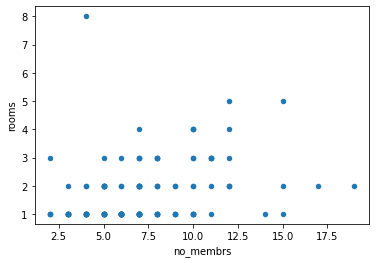

In [29]:
safi_df.plot.scatter('no_membrs','rooms')

## After Class Questions

````{dropdown} How can we clean data? what other topics will we cover in this class?

Great Question! We'll get to data cleaning soon. See the [Schedule](schedule).
````

````{dropdown} How does the syntax on the question from prismia today work?

The question was:

> Read the tables off of the [syllabus course map]('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html) page with `read_html` and make a list of the shapes of all of the tables on the page. Save the output to a variable and paste the *value* of that variable as your answer to the question.

And the solution was:
```{code-cell} ipython3
import pandas as pd
[df.shape for df in pd.read_html('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html')]
```

This uses something called a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions), they are a way to make lists, that look a lot like putting a for loop in a list. There are two ways to use them under the hood, as in the linked documentation, the one above is considered more pythonic, because it is more concise.

The `[]` define a list, we can do that with anything, for example my zoom meetings today were:


```{code-cell} ipython3
todays_meetings = ['writing QEM','CSC310', 'office hours']
todays_meetings
```
Note that the last line is there to display what happened, but it would work without.

We could get the same output using [`append`](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists) and a regular `for` loop. That  syntax would look like:

```{code-cell} ipython3
shape_list = []

for df in pd.read_html('https://rhodyprog4ds.github.io/BrownFall20/syllabus/course_map.html'):
    shape_list.append(df.shape)

shape_list
```

````


````{dropdown} Where I can go to find a list of all the syntax.

A *list* of all the syntax might be hard to find, but the [course textbook](https://jakevdp.github.io/PythonDataScienceHandbook/) is free online with a lot of reference material in it.

A lot of what we did today is in [Data Indexing and Selection](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html)

Also, the class notes are listed after each class on this website.

Also, you can get help from within a notebook and the [pandas User guide](https://pandas.pydata.org/docs/user_guide/index.html) has full details.


````

## More Practice

These additional questions are for if you want more practice with things we've done this week, before class next week.


````{dropdown} Which of the following is a dictionary?
```{code-cell} ipython3
opt1 = [char for char in 'abcde']
opt2 = {char:i for i, char in enumerate('abcde')}
opt3 = ('a','b','c','d','e')
opt4 =  'a b c d e'.split(' ')
```

Check using the `type` function. We can go further and build a list of them to display the one that's a dictionary.

First, we can look at them
```{code-cell} ipython3
options = [opt1, opt2, opt3, opt4]

for op in options:
    print(op)
```

Then we can check the types and find the dictionary
```{code-cell} ipython3
[op for op in options if type(op)==dict]
```

````


````{dropdown} What type is the shape of a pandas DataFrame?

We can find that by using the `type` function:
```{code-cell} ipython3
type(safi_df.shape)
```

`tuple` is another iterable type, so we can index them

```{code-cell} ipython3
safi_shape = safi_df.shape
safi_shape[0]
```

Also, in python, we can assign to multiple values when it returns a tuple. We saw this before, when we used the `items()` method on a dictionary.

```{code-cell} ipython3
ex_dict = {char:i for i, char in enumerate('abcde')}

for k,v in ex_dict.items():
    print(k, ' is the ',v,'th letter')

```

we can see that with the type function
```{code-cell} ipython3
[type(d) for ex_dict in d1.items()]
```

So, with the shape property we could also return it to two values

```{code-cell} ipython3
n_rows, n_cols = safi_df.shape
print('there are ',n_rows, ' rows and ', n_cols, ' columns')
```

````

````{dropdown} What does indexing with -1 do?

It returns the last value, here's an example, using the `todays_meetings` variable defined above.

```{code-cell} ipython3
todays_meetings
```


```{code-cell} ipython3
todays_meetings[-1]
```

## Further Reading



If you've made it this far, [let me know](https://forms.gle/PDATAmuRS5tAHiiZ8) how you found these notes.